## KNN
- KNN can be used for both classsification and regression task.
- KNN is a non linear model.
- KNN is also called lazy algorithm.
- KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)
- KNN is computationally very expensive.
- KNN is very easy to implement and interpret.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
 df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# No missing value by looking at count
# Outliers are present
# min record is invalid because SkinThickness and other record cannont be 0 (0 can be missing value) we will treat invalid record as missing values 

In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Missing value impuation

In [7]:
df.loc[:, "Glucose" : "BMI"] = df.loc[:, "Glucose" : "BMI"].replace(0, np.nan)

In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

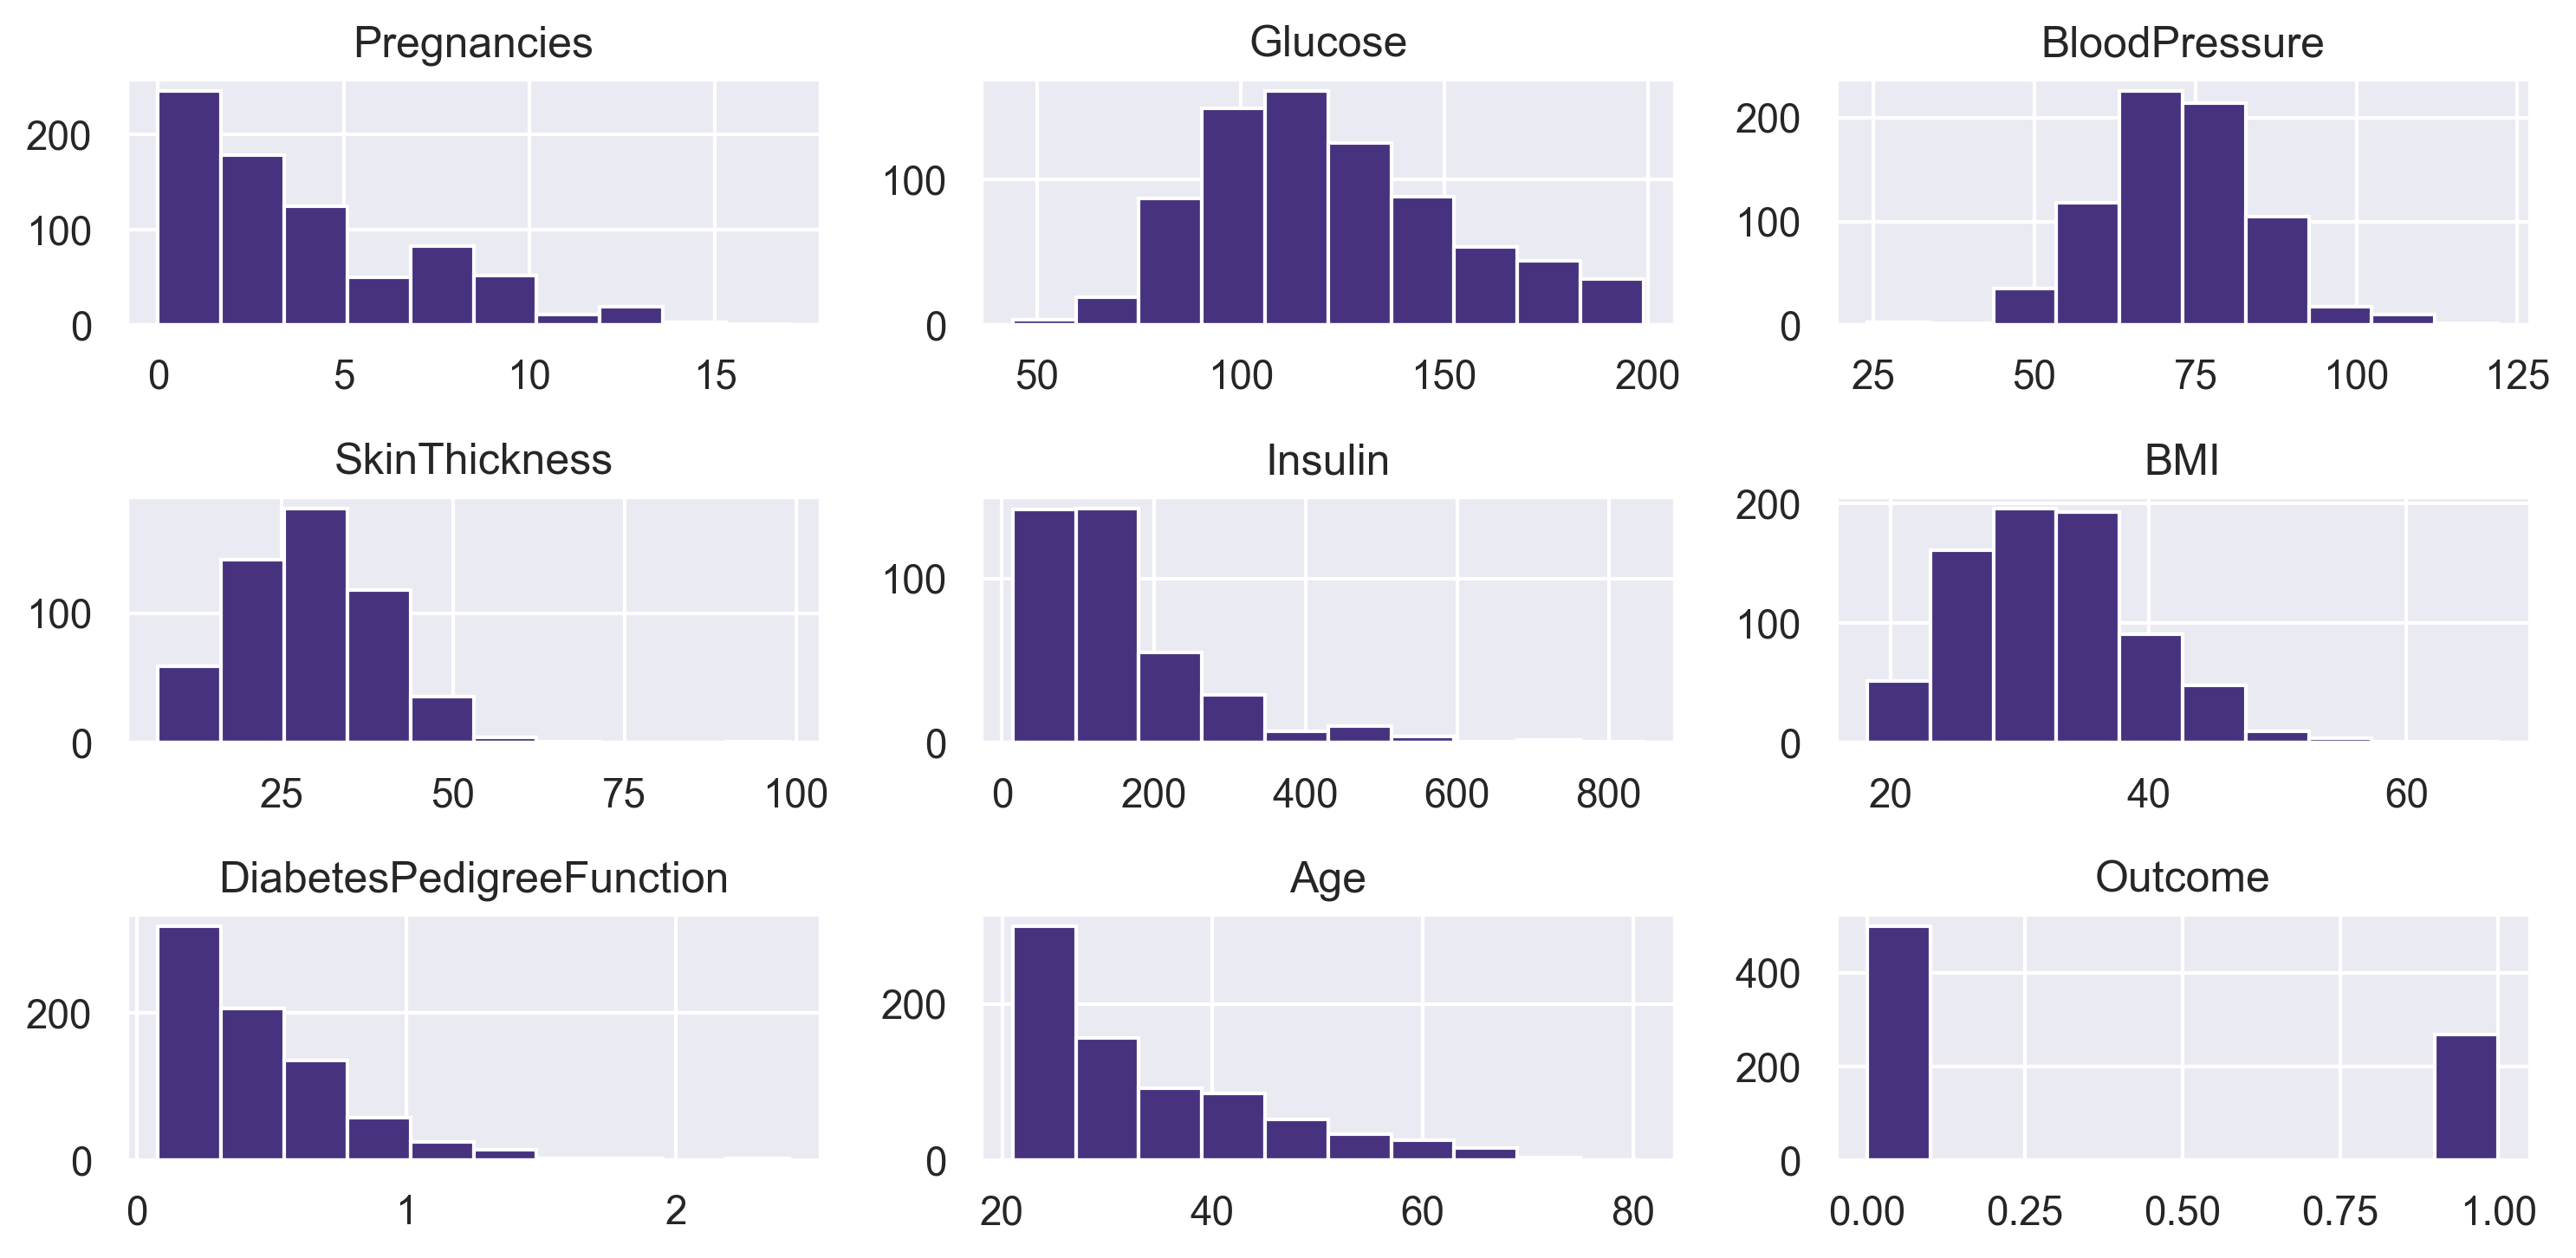

In [9]:
df.hist()
plt.tight_layout()

In [10]:
# As we can see 

In [11]:
from sklearn.impute import SimpleImputer

1. Handling Missing Data: When working with real-world datasets, it's common to encounter missing values. SimpleImputer provides a convenient way to replace these missing values with some other values.

2. Imputation Strategies: SimpleImputer supports various imputation strategies, including:

- Mean: Replaces missing values with the mean of the non-missing values in the column.
- Median: Replaces missing values with the median of the non-missing values in the column.
- Most Frequent: Replaces missing values with the most frequent (mode) value in the column.
- Constant: Replaces missing values with a specified constant value.

In [12]:
si = SimpleImputer(strategy="median")

In [13]:
df.loc[:, "Glucose": "BMI"] = si.fit_transform(df.loc[:, "Glucose": "BMI"])

In [14]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
feature = df.iloc[:,:-1]
target = df['Outcome']

In [16]:
#Model Building

In [17]:
sc = StandardScaler()

feature = sc.fit_transform(feature)

In [18]:
feature

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.2, random_state=1)

In [20]:
# n_neighbors=3 is taken randomly
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)

In [21]:
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.8436482084690554, 0.7792207792207793)

In [22]:
# Overfitted model because of k value

In [23]:
# Hyperparameter Tuning for KNN

In [24]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test_acc.append(knn.score(xtest, ytest))

In [25]:
pd.DataFrame({
    "Train Accuracy" : train_acc,
    "Test Accuracy" : test_acc
}, index=range(1, len(train_acc) + 1))

,Train Accuracy,Test Accuracy
1,1.000000,0.668831
2,0.833876,0.733766
3,0.843648,0.779221
4,0.812704,0.779221
5,0.819218,0.798701
6,0.799674,0.785714
7,0.794788,0.792208
8,0.794788,0.772727
9,0.798046,0.772727
10,0.785016,0.753247


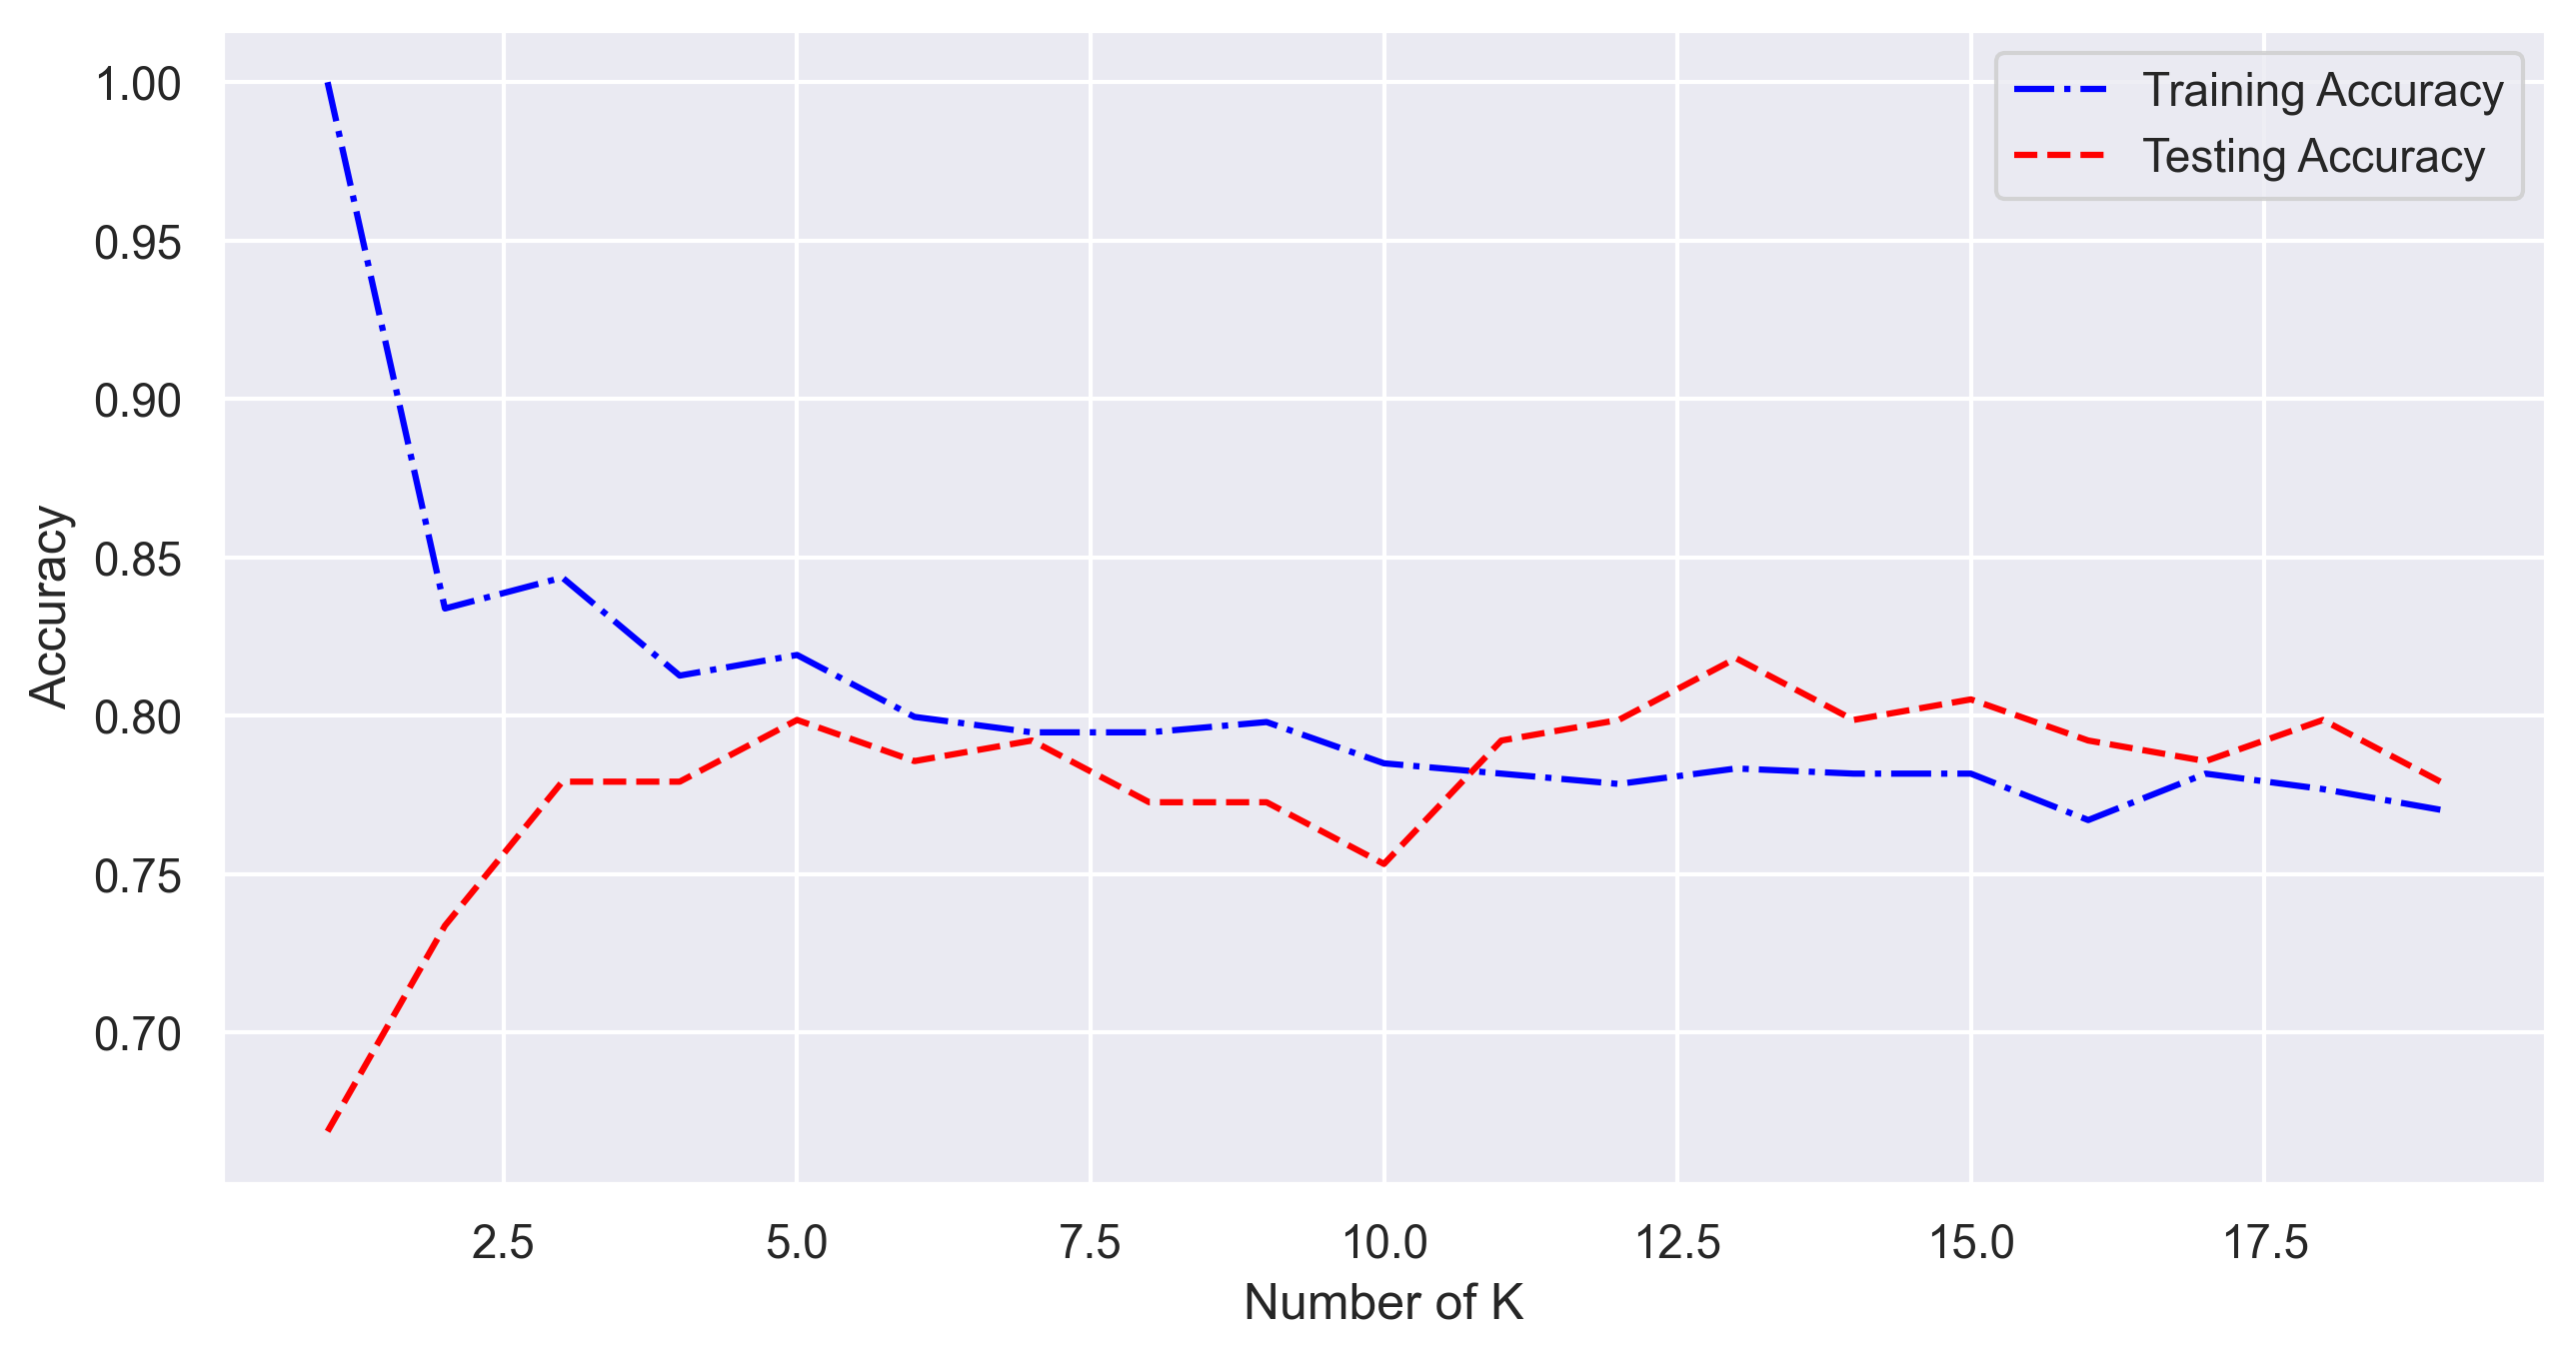

In [26]:
plt.plot(range(1,20), train_acc,linestyle = '-.', color = 'blue',label = 'Training Accuracy')
plt.plot(range(1,20),test_acc, linestyle = '--', color = 'red', label = 'Testing Accuracy')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
# we cannot select decimal val for k

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.8192182410423453, 0.7987012987012987)

In [29]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.7947882736156352, 0.7922077922077922)

In [31]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.62      0.68        55

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154

